In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

from sklearn.ensemble import BaggingClassifier
from pickle import dump

In [2]:
songlist = pd.read_csv('../data/2audioSongList.csv')

In [3]:
songlist = songlist[songlist['0'] != 0]
songlist

,genre,songName,artistName,0,1,2,3,4,5,6,...,190,191,192,193,194,195,196,197,198,199
1,Hip-Hop,THE SCOTTS,THE SCOTTS,283464.7625,0,32832.033630,-0.829849,44597.541720,-0.296928,31187.436050,...,10758.948990,0.672001,27402.351330,0.756942,31187.436050,-0.999975,44597.541720,0.296928,32832.033630,0.829849
2,Hip-Hop,Walk Em Down (feat. Roddy Ricch),NLE Choppa,244521.7562,0,39671.434390,-0.868570,31300.096690,-0.999969,30182.385570,...,20274.934280,0.731562,2961.159956,0.929701,30182.385570,0.190399,31300.096690,0.999969,39671.434390,0.868570
3,Hip-Hop,Flex (feat. Juice WRLD),Polo G,226077.4071,0,17779.417950,-0.947791,11709.690870,0.405713,13048.007890,...,15574.973970,0.122149,13150.287210,-0.149917,13048.007890,0.712056,11709.690870,-0.405713,17779.417950,0.947791
4,Hip-Hop,Solitaires (feat. Travis Scott),Future,297345.1232,0,24018.837830,0.653156,11057.100220,-0.108007,5682.826692,...,16967.712830,0.134227,9416.566662,0.188636,5682.826692,0.447221,11057.100220,0.108007,24018.837830,-0.653156
7,Hip-Hop,Deep End Freestyle,Sleepy Hallow,316619.4904,0,28021.542810,1.000000,25717.056870,-0.633831,34719.180690,...,26261.954020,1.000000,23720.754510,-0.978160,34719.180690,0.703252,25717.056870,0.633831,28021.542810,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,Dance/Electronic,Wait For You,pronouncedyea,188808.0109,0,29560.781200,0.351147,9622.157476,0.784087,5978.634588,...,7725.123936,-0.057383,1998.376881,-0.997808,5978.634588,-1.000000,9622.157476,-0.784087,29560.781200,-0.351147
10414,Dance/Electronic,Hallelujah,Will Clarke,353873.3719,0,11324.907540,-0.998336,9176.655347,0.163757,17064.592520,...,9828.813699,0.394347,12541.154740,-0.458429,17064.592520,-0.927914,9176.655347,-0.163757,11324.907540,0.998336
10415,Dance/Electronic,Magnolia,Steve Brian,245380.6554,0,4065.765802,-1.000000,15175.318670,-0.078333,14753.796670,...,2053.864416,0.899401,18312.658600,0.265284,14753.796670,0.107718,15175.318670,0.078333,4065.765802,1.000000
10416,Dance/Electronic,No Sleep (feat. Bonn),Martin Garrix,216305.8728,0,30306.340770,0.771810,23651.588310,-0.883048,7863.216564,...,15384.410660,0.883776,11543.587600,-0.698752,7863.216564,-0.503517,23651.588310,0.883048,30306.340770,-0.771810


In [4]:
songlist.groupby(['genre']).describe()

0                                            \
                   count           mean           std          min   
genre                                                                
Country           1209.0  233823.045897  43710.008226  96042.88039   
Dance/Electronic  1657.0  262257.804704  71189.722723  23567.57243   
Hip-Hop           1234.0  245150.786184  57989.629732  60980.32086   
Pop               1178.0  225823.382417  51697.802493  49743.41875   
R&B               1236.0  235309.478390  50957.667756  69184.43057   

                                                                         \
                           25%           50%           75%          max   
genre                                                                     
Country           208739.70920  238015.01700  264514.92830  343669.7843   
Dance/Electronic  223309.72990  272320.21710  310518.63420  445183.0659   
Hip-Hop           212122.08365  245887.69225  281150.73390  465117.5809   
Pop               192512.75630  227867.49550  261673.32505  415072.4748   
R&B               199596.43925  234128.45245  268476.33175  404262.8677   

                       1       ...           198                   199  \
                   count mean  ...           75%           max   count   
genre                          ...                                       
Country           1209.0  0.0  ...  18483.420420   83889.16678  1209.0   
Dance/Electronic  1657.0  0.0  ...  17258.112570   68949.63449  1657.0   
Hip-Hop           1234.0  0.0  ...  28013.357117   85055.05656  1234.0   
Pop               1178.0  0.0  ...  24174.583417  123611.90120  1178.0   
R&B               1236.0  0.0  ...  28589.365735   71419.84776  1236.0   

                                                                              
                      mean       std  min       25%       50%       75%  max  
genre                                                                         
Country           0.038150  0.763841 -1.0 -0.762478  0.032858  0.868309  1.0  
Dance/Electronic -0.009909  0.751098 -1.0 -0.800794 -0.028079  0.782321  1.0  
Hip-Hop          -0.002389  0.743335 -1.0 -0.799835 -0.005857  0.761004  1.0  
Pop               0.031461  0.767812 -1.0 -0.803159  0.083429  0.847331  1.0  
R&B              -0.010174  0.752530 -1.0 -0.786008 -0.048678  0.795267  1.0  

[5 rows x 1600 columns]

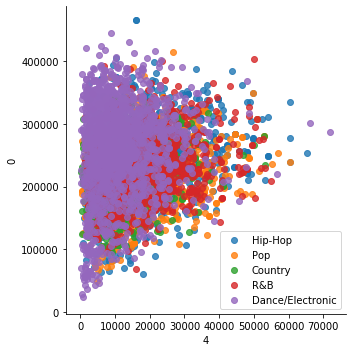

In [5]:
sns.lmplot( x="4", y="0", data=songlist, fit_reg=False, hue='genre', legend=False)
plt.legend(loc='lower right')

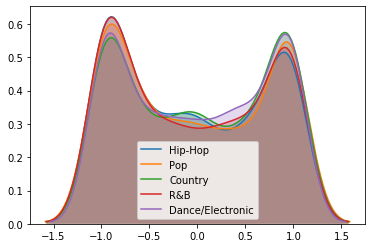

In [6]:
genres = songlist['genre'].unique()
for genre in genres:
    sns.kdeplot(songlist[songlist['genre']==genre]['13'], shade=True,label=genre)

In [7]:
def heatmap(pred_vals, actual_vals):
    data = {'y_Actual':    actual_vals,
                'y_Predicted': pred_vals
                }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)*100
    sns.heatmap(confusion_matrix, annot=True,fmt='.3g')
    plt.tight_layout()
    plt.show()

In [8]:
def scoreDataGraph(scoreData):
    print(scoreData.iloc[scoreData['validation_score'].idxmax,:])
    g = sns.regplot(x='num_steps',y='crossval_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Cross Validation")
    g = sns.regplot(x='num_steps',y='validation_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Testing")
    g = sns.regplot(x='num_steps',y='training_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Training")
    g.set_ylabel("Score")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show(g)

In [9]:
dataframesList = []
for x in songlist['genre'].unique():
    dataframesList.append(songlist[songlist['genre']==x].iloc[0:1178,:])

songListBalanced = pd.concat(dataframesList)


    
Xnp = np.asarray(songListBalanced[songListBalanced['genre'] != 'Dance/Electronic'].iloc[:,3:])
ynp = np.asarray(songListBalanced[songListBalanced['genre'] != 'Dance/Electronic']['genre'])
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.2, random_state=0)
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [10]:
Xnp

array([[ 2.83464763e+05,  0.00000000e+00,  3.28320336e+04, ...,
         2.96927641e-01,  3.28320336e+04,  8.29848884e-01],
       [ 2.44521756e+05,  0.00000000e+00,  3.96714344e+04, ...,
         9.99968957e-01,  3.96714344e+04,  8.68569962e-01],
       [ 2.26077407e+05,  0.00000000e+00,  1.77794179e+04, ...,
        -4.05713196e-01,  1.77794179e+04,  9.47791425e-01],
       ...,
       [ 3.15962583e+05,  0.00000000e+00,  1.88433226e+04, ...,
         9.99999980e-01,  1.88433226e+04, -3.57727980e-02],
       [ 2.99354888e+05,  0.00000000e+00,  1.10933678e+04, ...,
         3.66911840e-02,  1.10933678e+04,  6.77421243e-01],
       [ 2.29812689e+05,  0.00000000e+00,  2.94339397e+04, ...,
        -9.98710595e-01,  2.94339397e+04, -9.53699369e-01]])

# Random Forest W/O EDM

In [11]:
param_grid = [
    {'max_depth':[2,3,4,5,6,7,8,9,10],'random_state':[0]}
]

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_training[:, ::2], y_training)
print(grid_search.best_estimator_.score(X_training[:, ::2], y_training))
print(grid_search.best_estimator_.score(X_validation[:, ::2], y_validation))


0.924274593064402
0.5238600212089077


In [12]:
print(grid_search.best_score_)

0.5109678226336033


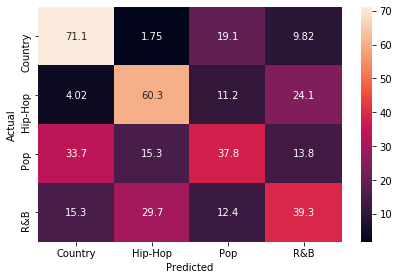

In [14]:
heatmap(grid_search.best_estimator_.predict(X_validation[:, ::2]),y_validation)

In [22]:
# save the model
dump(grid_search.best_estimator_, open('2audioRFC.pkl', 'wb'))

# SGD Classifier w/o EDM

In [16]:
param_grid = [
    {'max_iter':[500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700],'tol':[1e-3]}
]

clf = linear_model.SGDClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_training[:, ::2], y_training)
    
print([grid_search.best_score_ , grid_search.best_estimator_.score(X_validation[:, ::2], y_validation), grid_search.best_estimator_.score(X_training[:, ::2], y_training)])



[0.38110009693861596, 0.33828207847295866, 0.3871196036801132]


In [17]:
grid_search.best_estimator_.coef_

array([[ 5.40752890e+03, -9.15535439e+03, -2.32511645e+03,
         1.83655468e+03, -1.13187123e+03, -4.80700711e+03,
         1.94666855e+03, -3.94976833e+03,  4.25501944e+02,
        -8.74305165e+03, -5.33923320e+03, -4.33466854e+03,
        -8.98214777e+03,  2.50110654e+03, -2.17917331e+02,
        -2.81650595e+04, -3.76401989e+03,  8.59667691e+03,
        -1.51430770e+04, -4.94751494e+04, -1.82048531e+04,
        -3.62052135e+04, -1.56194512e+03, -3.04467012e+04,
        -4.80692306e+04, -5.08056232e+04, -2.32968113e+04,
        -4.84650693e+04,  4.60529303e+02, -3.14181838e+04,
        -6.65130590e+03, -2.92178156e+04, -6.39526796e+04,
        -9.79182408e+03,  6.34573530e+03, -5.34607864e+04,
         2.00462065e+04,  8.16010591e+03,  5.43429477e+04,
        -3.43900975e+03, -9.33813614e+03,  1.43465737e+04,
        -2.12530101e+04, -1.06194536e+04, -1.08847215e+03,
        -1.95686005e+04, -1.10223798e+04, -3.26497477e+04,
        -1.16851489e+04,  2.12133528e+03,  1.18892379e+0

# Decision Tree with Bagging

In [20]:
bag_clf = BaggingClassifier(
    RandomForestClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs = -1)
bag_clf.fit(X_training, y_training)
print(bag_clf.score(X_training, y_training))
print(bag_clf.score(X_validation, y_validation))

0.56758669497523
0.4517497348886532
